TOUT LES PACKAGES IMPORTÉS

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from joblib import dump
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore') 


from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

### 1. Importation des données

In [2]:
X_train = np.loadtxt('DataSet/Train/X_train.txt', delimiter=' ')
Y_train = np.loadtxt('DataSet/Train/y_train.txt')

X_test = np.loadtxt('DataSet/Test/X_test.txt', delimiter=' ')
Y_test = np.loadtxt('DataSet/Test/y_test.txt')

In [3]:
with open('DataSet/features.txt', 'r') as file:
    features = file.read().splitlines()

In [4]:
DF_train = pd.DataFrame(X_train, columns= [features])
DF_test = pd.DataFrame(X_test, columns= [features])

In [5]:
DF_train.head(5)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


### 2. PCA (réduction de la dataframe)

In [6]:
pca = PCA(n_components = 0.80)
pca_fitted = pca.fit_transform(DF_train)

Text(0.5, 1.0, 'Variance Expliquée vs. Nombre de Composants')

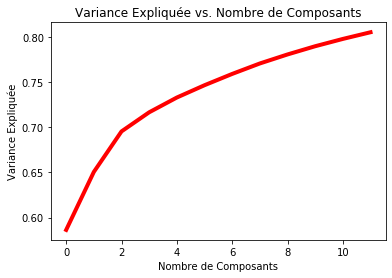

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='Red', linewidth=4)
plt.xlabel('Nombre de Composants')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée vs. Nombre de Composants')

Text(0.5, 1.0, 'Éboulis des valeurs propres')

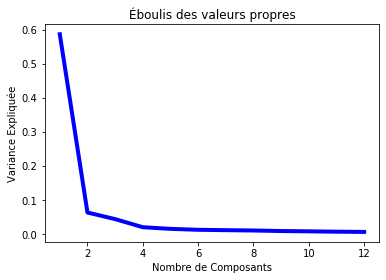

In [8]:
nb_of_components = list(range(1,len(pca.explained_variance_ratio_)+1))

plt.plot(nb_of_components ,pca.explained_variance_ratio_, color='blue', linewidth=4)
plt.xlabel('Nombre de Composants')
plt.ylabel('Variance Expliquée')
plt.title('Éboulis des valeurs propres')

In [9]:
pca.explained_variance_ratio_

array([0.58635593, 0.06425612, 0.04489017, 0.02116905, 0.01636383,
       0.01363504, 0.01251664, 0.01158892, 0.00998506, 0.00910735,
       0.0080903 , 0.00740391])

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58635593, 0.65061206, 0.69550222, 0.71667127, 0.7330351 ,
       0.74667014, 0.75918678, 0.77077569, 0.78076075, 0.7898681 ,
       0.79795839, 0.80536231])

### 3.Variation du nombre de composantes 

In [11]:
LR = LogisticRegression(C=1, random_state = 0, solver = "liblinear")
RFC = RandomForestClassifier(random_state = 0)
SVC = svm.SVC(C=1, random_state = 0, kernel='linear')

In [12]:
LR_pred = []
RFC_pred = []
SVC_pred = []

nb_of_components = []

variance_exp = 0
components = 0

while variance_exp < 0.80:
    components = components + 1
    pca = PCA(n_components = components)
    X_train_red = pca.fit_transform(X_train)
    
    variance_exp = pca.explained_variance_ratio_.sum()
    
    X_test_red = pca.fit_transform(X_test)
    
    LR = LR.fit(X_train_red,Y_train)
    LR_pred.append(LR.score(X_test_red,Y_test))
    
    RFC = RFC.fit(X_train_red,Y_train)
    RFC_pred.append(RFC.score(X_test_red,Y_test))
    
    SVC = SVC.fit(X_train_red, Y_train)
    SVC_pred.append(SVC.score(X_test_red,Y_test))

    nb_of_components.append(components)

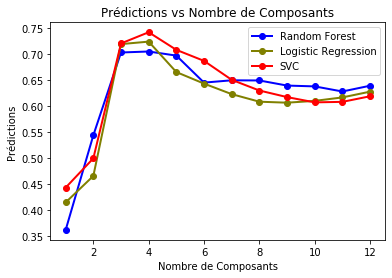

In [30]:
plt.plot( nb_of_components, RFC_pred, marker='o', color='blue', linewidth=2, label="Random Forest")
plt.plot( nb_of_components, LR_pred, marker='o', color='olive', linewidth=2, label="Logistic Regression")
plt.plot( nb_of_components, SVC_pred, marker='o', color='red', linewidth=2, label="SVC")
plt.xlabel('Nombre de Composants')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Nombre de Composants')
plt.legend()

In [14]:
pca = PCA(n_components = 4)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.fit_transform(X_test) 

### 4. Variation des hypers paramètres

In [15]:
GS_LR = GridSearchCV(LogisticRegression(random_state = 0, solver = "liblinear"),{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":("l1", "l2"), "max_iter":[1000, 10000, 100000]}, cv = 5, n_jobs = 6)
fitted_GS_LR = GS_LR.fit(X_train_red, Y_train)

Y_pred_LR = GS_LR.predict(X_test_red)

print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred_LR)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred_LR, average='weighted')))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred_LR, average='weighted')))

Accuracy Score : 0.724225173940544
Precision Score : 0.7119828087937785
F1 Score : 0.7099965153647173


Text(0.5, 1, 'Valeurs Réels vs Prédictions')

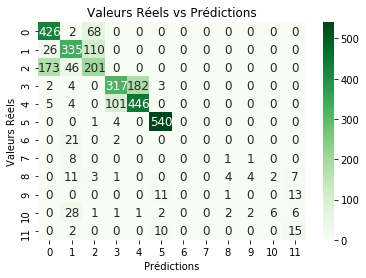

In [32]:
sn.heatmap(confusion_matrix(Y_test, Y_pred_LR), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Greens, fmt='g')
plt.ylabel('Valeurs Réels')
plt.xlabel('Prédictions')
plt.title('Valeurs Réels vs Prédictions')

In [29]:
GS_RFC = GridSearchCV(RandomForestClassifier(random_state = 0),{"n_estimators":[50, 100, 200], "max_depth":[2, 3, 5], "min_samples_leaf":[0.1, 0.2, 0.3], "max_features":list(range(2,int(len(X_train_red[0,:]))))},cv = 5, n_jobs = 6 )
fitted_GS_RFC = GS_RFC.fit(X_train_red, Y_train)

Y_pred_RFC = GS_RFC.predict(X_test_red)

print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred_RFC)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred_RFC, average='weighted')))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred_RFC, average='weighted')))

Accuracy Score : 0.7346616065781151
Precision Score : 0.696627813548506
F1 Score : 0.7062948120573432


Text(0.5, 1, 'Valeurs Réels vs Prédictions')

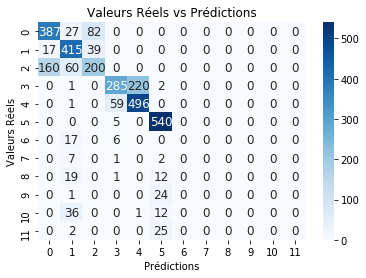

In [33]:
sn.heatmap(confusion_matrix(Y_test, Y_pred_RFC), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Blues, fmt='g')
plt.ylabel('Valeurs Réels')
plt.xlabel('Prédictions')
plt.title('Valeurs Réels vs Prédictions')

In [19]:
GS_SVC = GridSearchCV(svm.SVC(random_state = 0, kernel='linear'), {"C":[0.01, 0.1, 1, 10, 100], "max_iter":[1000, 10000, 100000, 1000000]}, cv = 5, n_jobs = 6)
fitted_GS_SVC = GS_SVC.fit(X_train_red, Y_train)

Y_pred_SVC = GS_SVC.predict(X_test_red)

print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred_SVC)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred_SVC, average='weighted')))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred_SVC, average='weighted')))

Accuracy Score : 0.7526881720430108
Precision Score : 0.7553584767531201
F1 Score : 0.7436576736463515


Text(0.5, 1, 'Valeurs Réels vs Prédictions')

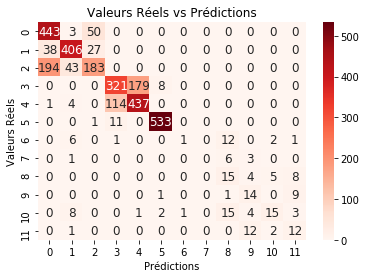

In [34]:
sn.heatmap(confusion_matrix(Y_test, Y_pred_SVC), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Reds, fmt='g')
plt.ylabel('Valeurs Réels')
plt.xlabel('Prédictions')
plt.title('Valeurs Réels vs Prédictions')